In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Casos_positivos_de_Viruela.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4294 entries, 0 to 4293
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Semana epidemiológica                 4294 non-null   int64  
 1   Año epidemiológico                    4294 non-null   int64  
 2   Código DIVIPOLA departamento          4292 non-null   float64
 3   Código DIVIPOLA municipio             4292 non-null   float64
 4   Departamento                          4294 non-null   object 
 5   Municipio                             4294 non-null   object 
 6   Fecha notificación                    4294 non-null   object 
 7   Fecha diagnóstico                     4294 non-null   object 
 8   Sexo                                  4294 non-null   object 
 9   Edad                                  4294 non-null   int64  
 10  Unidad de medida                      4294 non-null   int64 


Valores faltantes por columna:
Semana epidemiológica                      0
Año epidemiológico                         0
Código DIVIPOLA departamento               2
Código DIVIPOLA municipio                  2
Departamento                               0
Municipio                                  0
Fecha notificación                         0
Fecha diagnóstico                          0
Sexo                                       0
Edad                                       0
Unidad de medida                           0
Fecha de inicio de síntomas                0
Fecha de exantema                          0
Hospitalización                            0
Condición final                            0
Vínculo epidemiológico                     0
¿Viajó?                                    1
País de viaje                           4134
Fuente de infección                        0
Fecha de terminación del seguimiento       0
Pertenencia étnica                         0
Nombre grupo étnico    

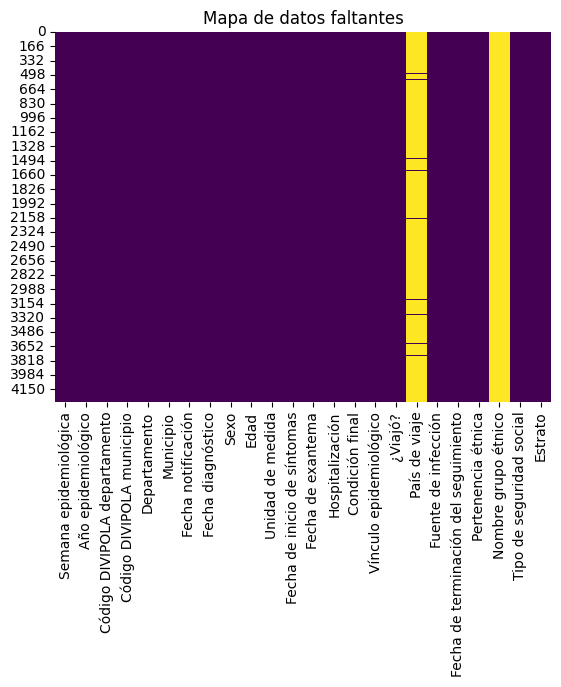

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


Número de filas después de eliminar datos faltantes: 4294

Datos faltantes por columna después de la limpieza:
Semana epidemiológica                   0
Año epidemiológico                      0
Código DIVIPOLA departamento            2
Código DIVIPOLA municipio               2
Departamento                            0
Municipio                               0
Fecha notificación                      0
Fecha diagnóstico                       0
Sexo                                    0
Edad                                    0
Unidad de medida                        0
Fecha de inicio de síntomas             0
Fecha de exantema                       0
Hospitalización                         0
Condición final                         0
Vínculo epidemiológico                  0
¿Viajó?                                 1
País de viaje                           0
Fuente de infección                     0
Fecha de terminación del seguimiento    0
Pertenencia étnica                      0
Nombre

/tmp/ipython-input-3762306404.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


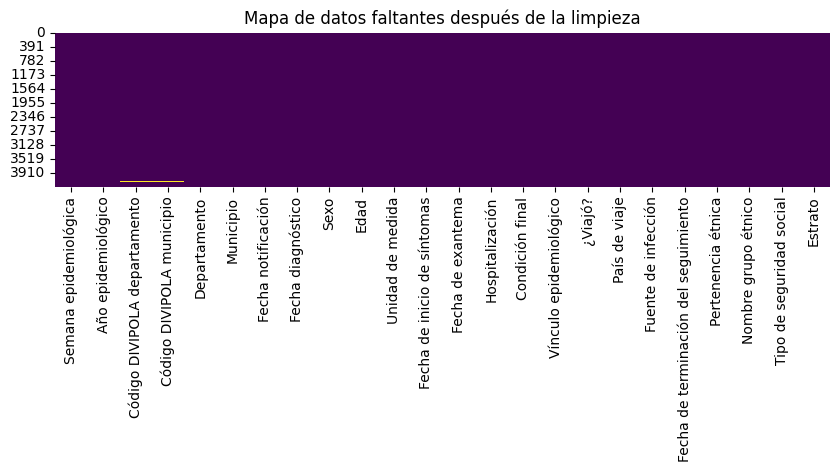

In [ ]:
# 3. Eliminar filas con datos faltantes y verificar limpieza

# Fill missing values in 'País de viaje' and 'Nombre grupo étnico' columns
df_cleaned = df.copy()
df_cleaned['País de viaje'] = df_cleaned['País de viaje'].fillna('Desconocido')
df_cleaned['Nombre grupo étnico'] = df_cleaned['Nombre grupo étnico'].fillna('Desconocido')

# Drop rows with missing values based on a threshold (e.g., keep rows with at least 20 non-null values)
df_cleaned = df_cleaned.dropna(thresh=20)

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_cleaned.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_cleaned.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar empty if the cleaning was successful)
plt.figure(figsize=(10, 2))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Casos_positivos_de_Viruela.csv")

df_filtrado_columnas=["Edad","Sexo","Departamento","Semana epidemiológica","Año epidemiológico","Condición final"]
df_filtrado = df[df_filtrado_columnas].copy() # Assign the filtered DataFrame to df_filtrado
print(df_filtrado.columns)
print("\nInformación del subset del dataset")
print(df_filtrado.info())
print("\nPrimeras filas del subset del dataset")
display(df_filtrado.head())

Index(['Edad', 'Sexo', 'Departamento', 'Semana epidemiológica',
       'Año epidemiológico', 'Condición final'],
      dtype='object')

Información del subset del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4294 entries, 0 to 4293
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Edad                   4294 non-null   int64 
 1   Sexo                   4294 non-null   object
 2   Departamento           4294 non-null   object
 3   Semana epidemiológica  4294 non-null   int64 
 4   Año epidemiológico     4294 non-null   int64 
 5   Condición final        4294 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 201.4+ KB
None

Primeras filas del subset del dataset


,Edad,Sexo,Departamento,Semana epidemiológica,Año epidemiológico,Condición final
0,37,M,ANTIOQUIA,19,2023,1
1,18,M,ANTIOQUIA,37,2022,1
2,30,M,BOGOTA,37,2022,1
3,37,M,ANTIOQUIA,37,2022,1
4,26,M,ANTIOQUIA,33,2022,1


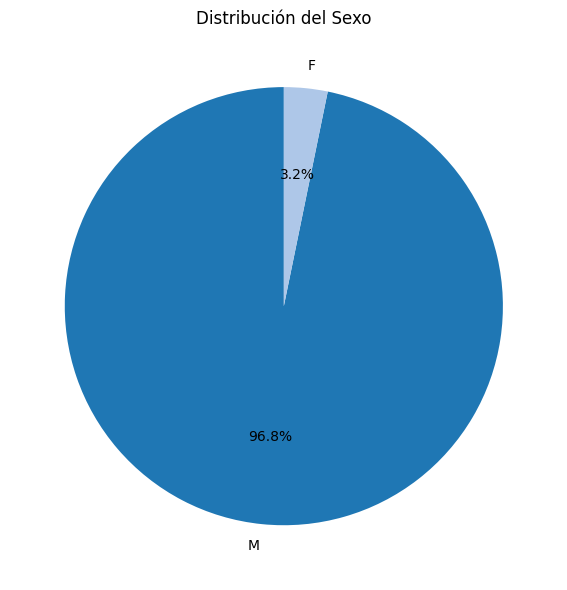

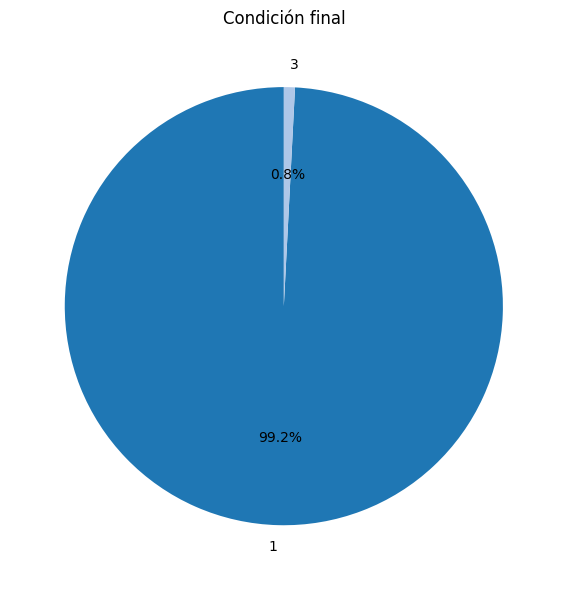

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [
    ('Sexo', 'Distribución del Sexo'),
    ('Condición final', 'Condición final')
]

df_filtrado_columnas=["Edad","Sexo","Departamento","Semana epidemiológica","Año epidemiológico","Condición final"]


for var, title in categorical_vars:
    plt.figure(figsize=(6, 6))
    df[df_filtrado_columnas][var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

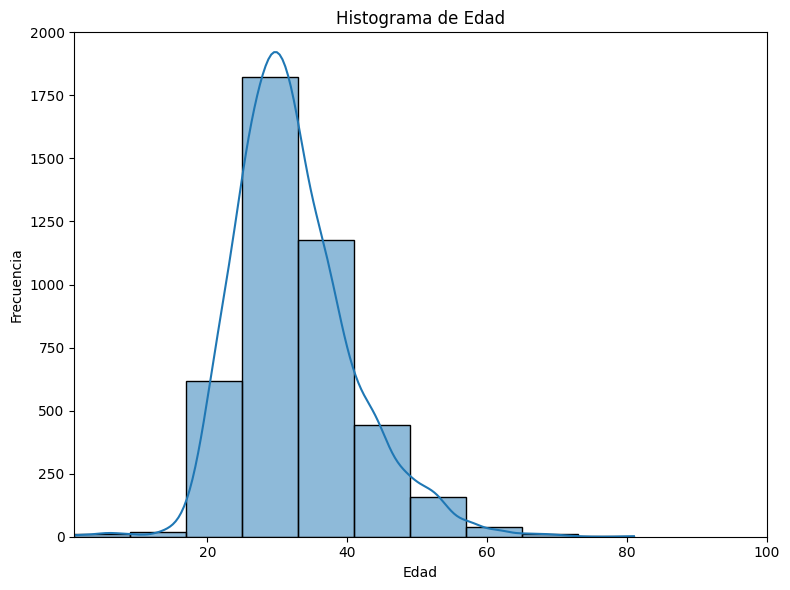

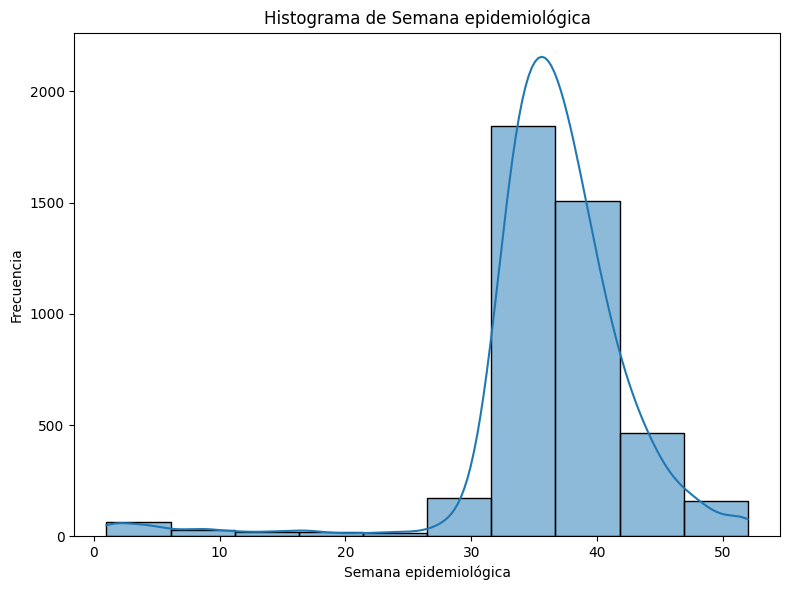

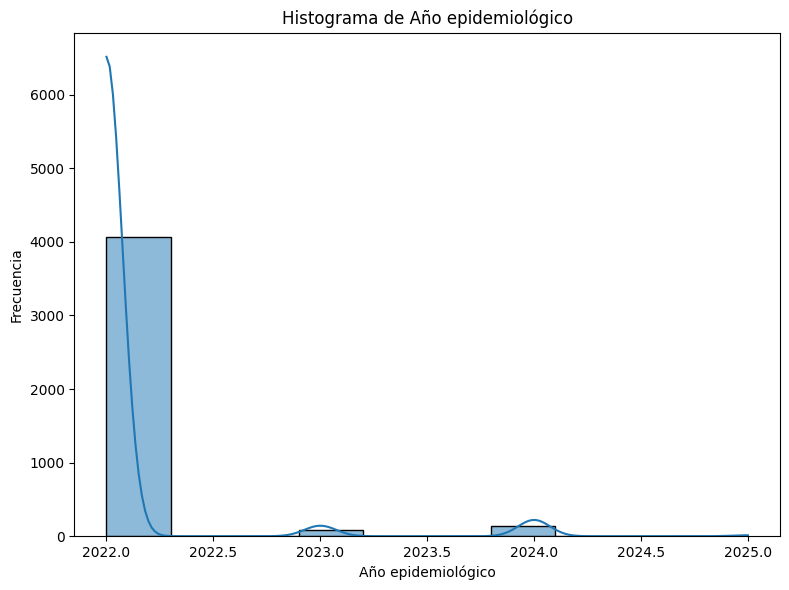

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para Edad
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Edad'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.xlim(1, 100) # Establecer límite del eje X de 1 a 100
plt.ylim(0, 2000) # Establecer límite del eje Y de 0 a 2000
plt.tight_layout()
plt.show()

# Histograma para Semana epidemiológica
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Semana epidemiológica'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Semana epidemiológica')
plt.ylabel('Frecuencia')
plt.title('Histograma de Semana epidemiológica')
plt.tight_layout()
plt.show()

# Histograma para Año epidemiológico
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Año epidemiológico'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Año epidemiológico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Año epidemiológico')
plt.tight_layout()
plt.show()

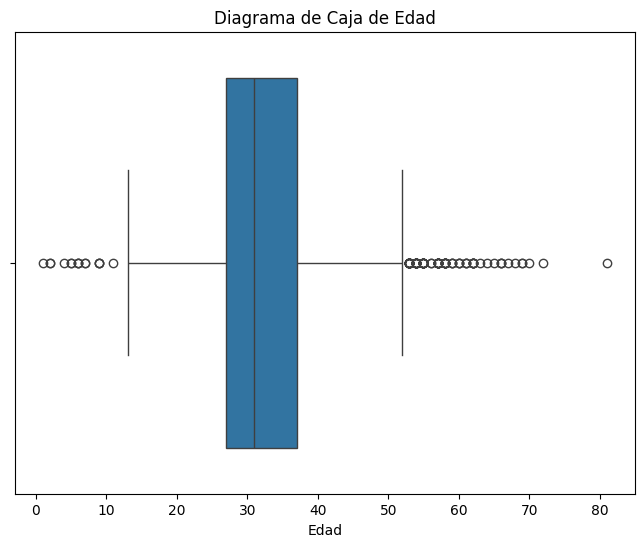

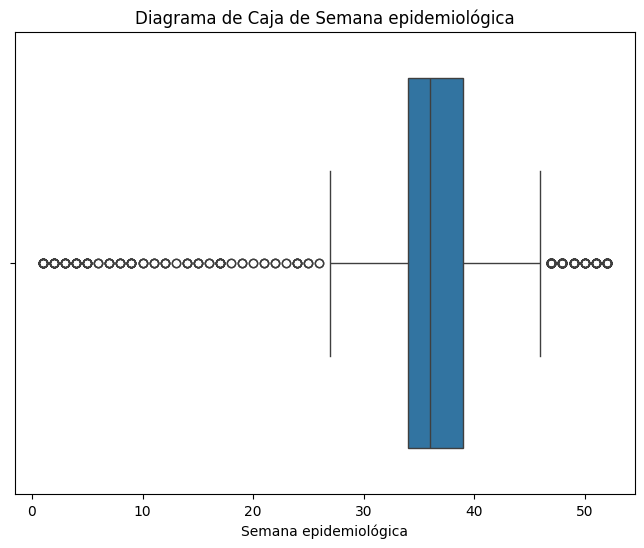

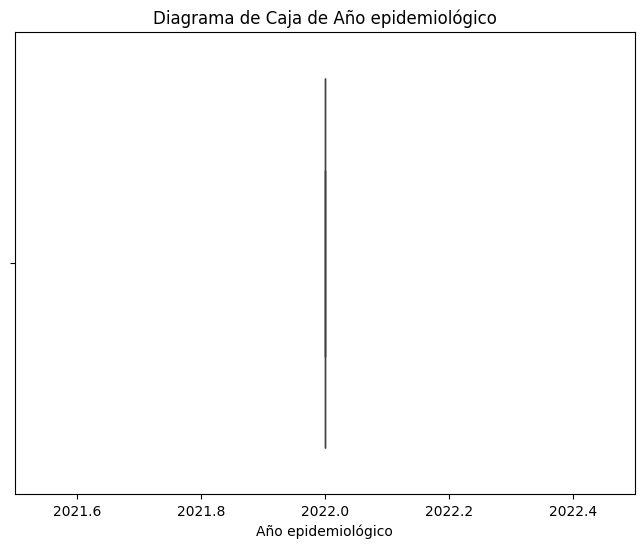

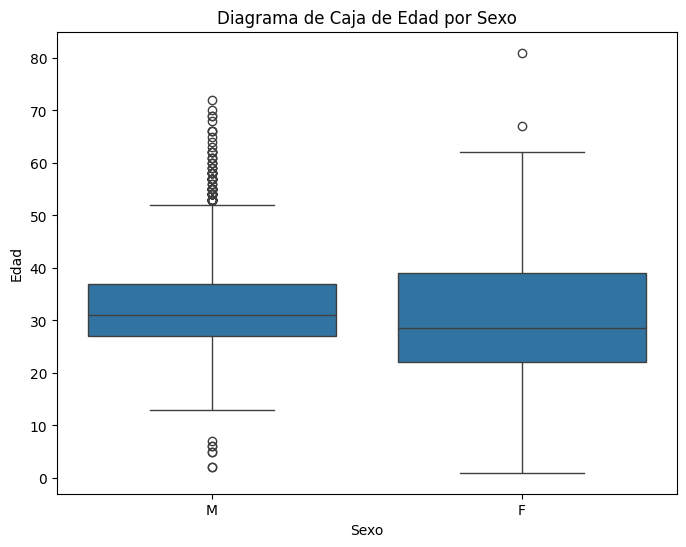

In [ ]:
# Diagrama de caja para Edad
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtrado['Edad'])
plt.xlabel('Edad')
plt.title('Diagrama de Caja de Edad')
plt.show()

# Diagrama de caja para Semana epidemiológica
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtrado['Semana epidemiológica'])
plt.xlabel('Semana epidemiológica')
plt.title('Diagrama de Caja de Semana epidemiológica')
plt.show()

# Diagrama de caja para Año epidemiológico
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtrado['Año epidemiológico'])
plt.xlabel('Año epidemiológico')
plt.title('Diagrama de Caja de Año epidemiológico')
# Ajustar los límites del eje X para intentar mostrar la caja (cerca de 2022)
plt.xlim(2021.5, 2022.5) # Ajusta este rango si es necesario para centrarte en la caja
plt.show()

# Diagrama de caja de Edad por Sexo
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sexo', y='Edad', data=df_filtrado)
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.title('Diagrama de Caja de Edad por Sexo')
plt.show()

# Diagrama de caja de Edad por Departamento (puede ser demasiado si hay muchos departamentos)
# Considerar mostrar solo los departamentos con más casos si es necesario
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Departamento', y='Edad', data=df_filtrado)
# plt.xlabel('Departamento')
# plt.ylabel('Edad')
# plt.title('Diagrama de Caja de Edad por Departamento')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

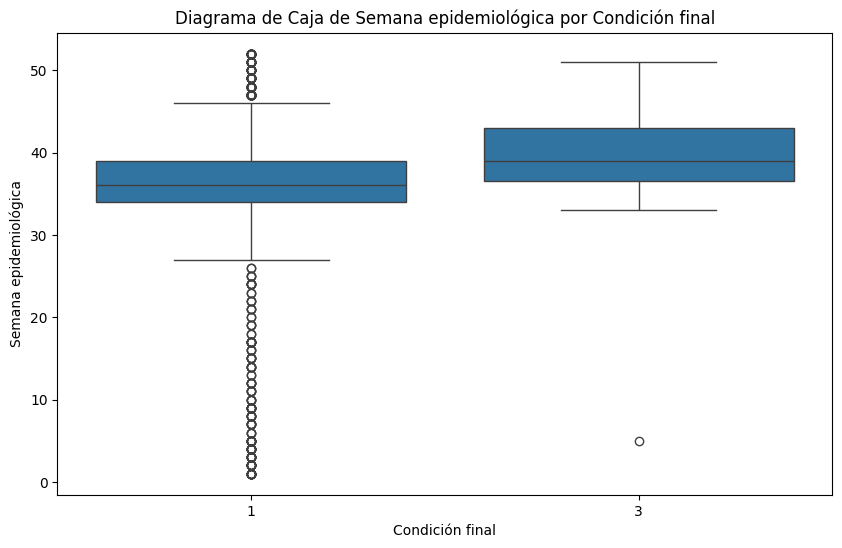

In [ ]:
# Diagrama de caja de Semana epidemiológica por Condición final
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condición final', y='Semana epidemiológica', data=df_filtrado)
plt.xlabel('Condición final')
plt.ylabel('Semana epidemiológica')
plt.title('Diagrama de Caja de Semana epidemiológica por Condición final')
plt.show()

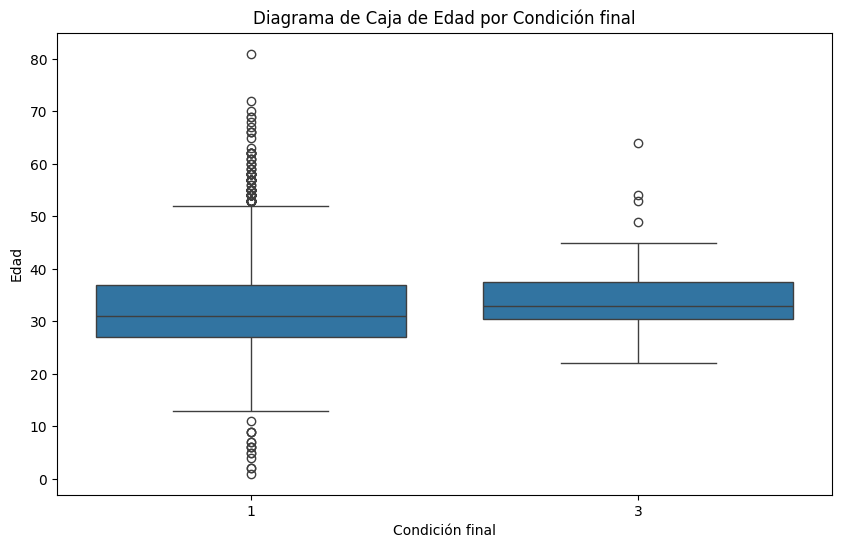

In [ ]:
# Diagrama de caja de Edad por Condición final
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condición final', y='Edad', data=df_filtrado)
plt.xlabel('Condición final')
plt.ylabel('Edad')
plt.title('Diagrama de Caja de Edad por Condición final')
plt.show()

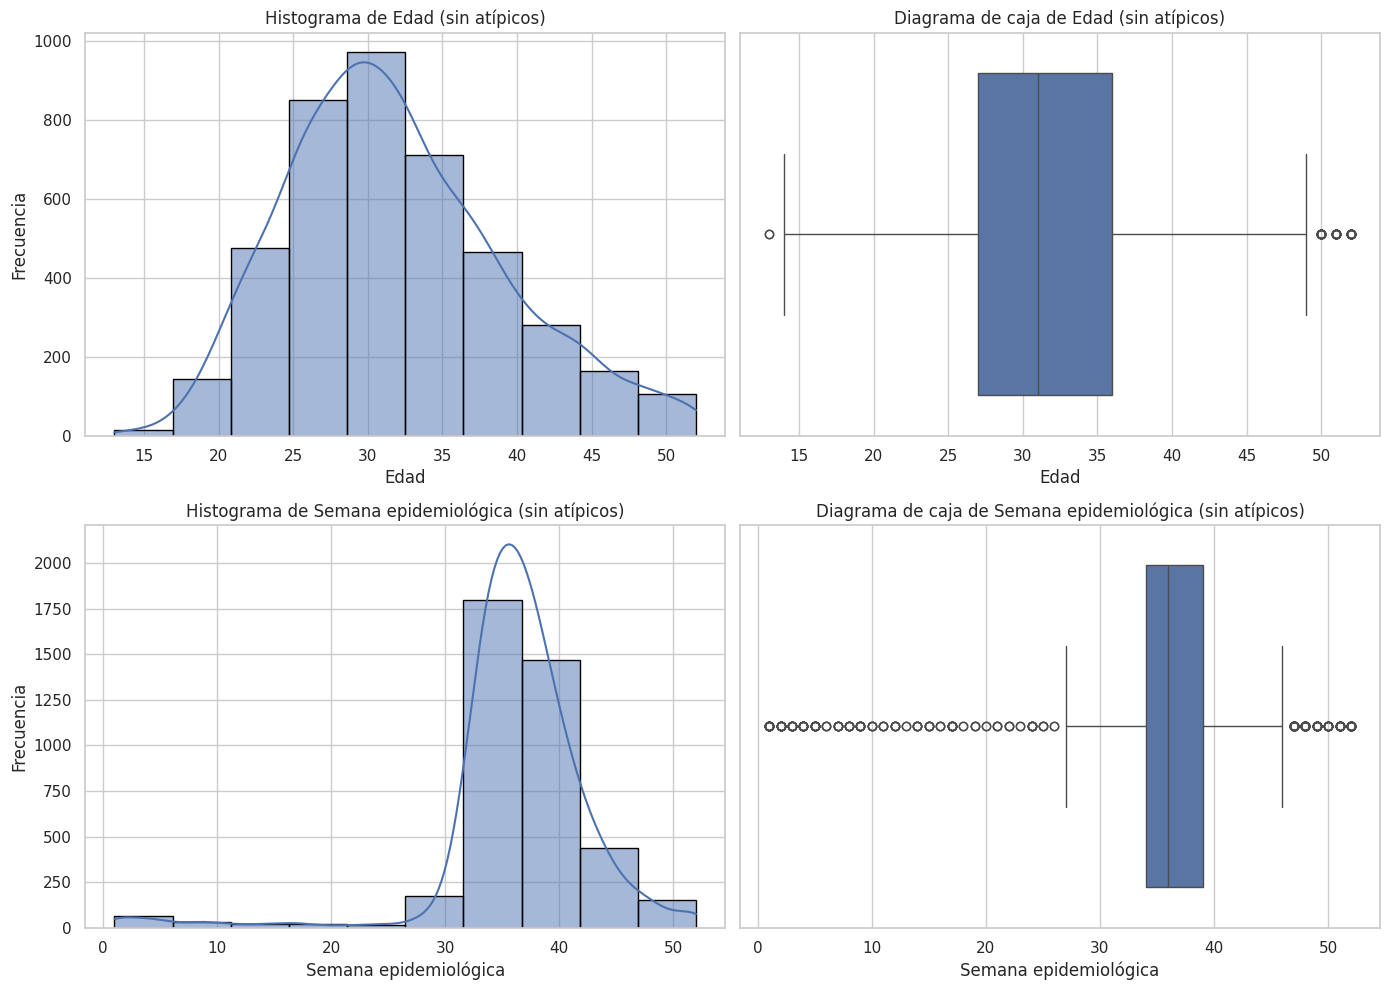

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma y boxplot para Edad
sns.histplot(df_sinatipicos['Edad'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Histograma de Edad (sin atípicos)')

sns.boxplot(x=df_sinatipicos['Edad'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Edad')
axes[0, 1].set_title('Diagrama de caja de Edad (sin atípicos)')

# Histograma y boxplot para Semana epidemiológica
sns.histplot(df_sinatipicos['Semana epidemiológica'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Semana epidemiológica')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Histograma de Semana epidemiológica (sin atípicos)')

sns.boxplot(x=df_sinatipicos['Semana epidemiológica'], ax=axes[1, 1])
axes[1, 1].set_xlabel('Semana epidemiológica')
axes[1, 1].set_title('Diagrama de caja de Semana epidemiológica (sin atípicos)')

plt.tight_layout()
plt.show()


Resultados de los tests de normalidad (valores p):

Variable: Edad
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 43.9629, Crítico (5%): 0.7860
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)

Variable: Semana epidemiológica
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 200.5573, Crítico (5%): 0.7860
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



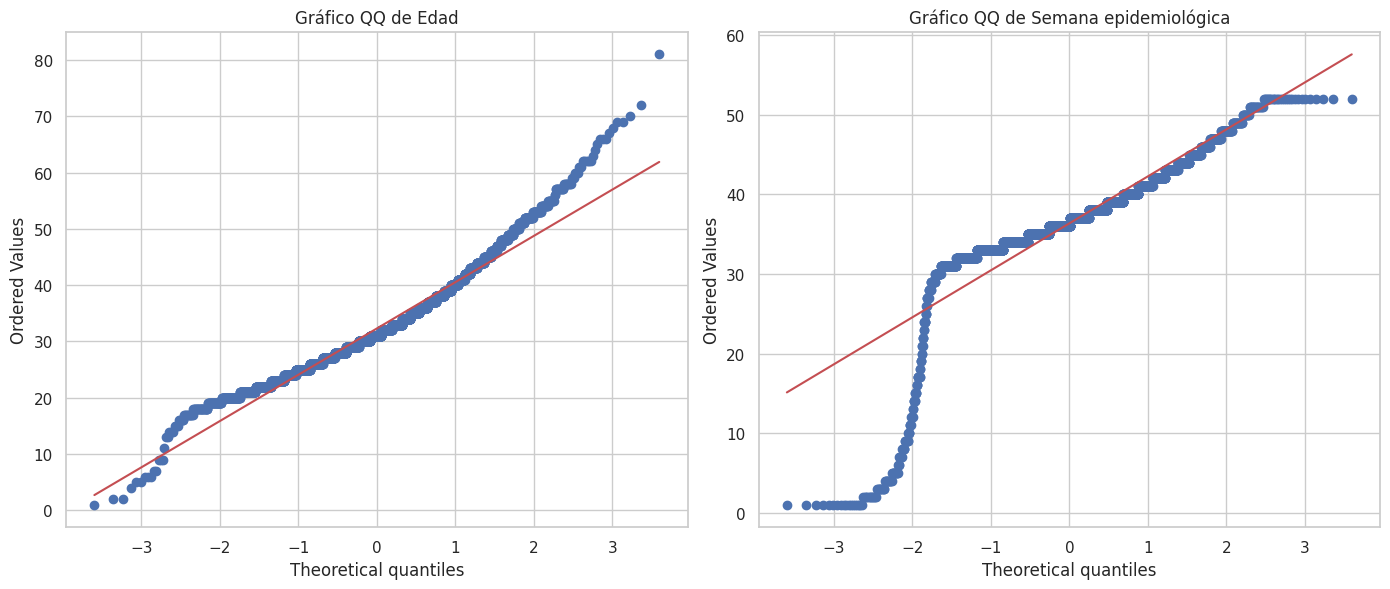

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_fisicas = ['Edad', 'Semana epidemiológica']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable
for col in columnas_fisicas:
    if col in df.columns:
        datos = df[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }

# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(columnas_fisicas):
    if col in df.columns:
        probplot(df[col].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()


In [ ]:
# Contar la frecuencia de cada departamento
department_counts = df_filtrado['Departamento'].value_counts()

# Lista de departamentos que no son de Colombia (basado en la exploración previa)
foreign_locations = ['ESPAÑA', 'BARCELONA', 'ALEMANIA', 'ESTADOS UNIDOS', 'BRASIL']

# Filtrar los departamentos colombianos
colombian_departments = department_counts[~department_counts.index.isin(foreign_locations)]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
colombian_departments.plot(kind='bar')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de casos por Departamento en Colombia')
plt.ylim(0, 2000) # Establecer límite del eje Y hasta 2000
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()